\section{PCA and clustering on molecular features}

In [ ]:
import pandas as pd
data = pd.read_csv("../data/processed/iuphar_labeled2.csv")

,Compound,Smiles,Interaction
0,gefitinib,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,0
1,1-nonene,C=CCCCCCCC,0
2,tetrachloroethylene,ClC(Cl)=C(Cl)Cl,0
3,unii-6m09zns9d1,CN(C)CCO[C@](C)(c1ccccc1)c1ccc(Cl)cc1,0
4,zinc31983000,CN1CCN(C(=O)O[C@@H]2C3=C(SCCS3)C(=O)N2c2ccc3cc...,0
...,...,...,...
1041,darigabat,CN1C(=O)CN=C(c2ccccc2)c2cc(Cl)ccc21,1
1042,ganaxolone,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@](C)(O)...,1
1043,indiplon,CC(=O)N(C)c1cccc(-c2ccnc3c(C(=O)c4cccs4)cnn23)c1,1
1044,[3H]zolpidem,Cc1ccc(-c2nc3ccc(C)cn3c2CC(=O)N(C)C)cc1,1


In [ ]:
# Compute features (RDKit descriptors and Morgan fingerprints) for molecules
import importlib
import compute_features

importlib.reload(compute_features)
extractor = compute_features.FeatureExtractor(data)
data_bulked = extractor.run()
print(f"Number of features in data_bulked: {data_bulked.shape[1]}")


Number of RDKIT descriptors:  217


[13:30:56] DEPRECATION WARNING: please use MorganGenerator
[13:30:56] DEPRECATION WARNING: please use MorganGenerator
[13:30:56] DEPRECATION WARNING: please use MorganGenerator
[13:30:56] DEPRECATION WARNING: please use MorganGenerator
[13:30:56] DEPRECATION WARNING: please use MorganGenerator
[13:30:56] DEPRECATION WARNING: please use MorganGenerator
[13:30:56] DEPRECATION WARNING: please use MorganGenerator
[13:30:56] DEPRECATION WARNING: please use MorganGenerator
[13:30:56] DEPRECATION WARNING: please use MorganGenerator
[13:30:56] DEPRECATION WARNING: please use MorganGenerator
[13:30:56] DEPRECATION WARNING: please use MorganGenerator
[13:30:56] DEPRECATION WARNING: please use MorganGenerator
[13:30:56] DEPRECATION WARNING: please use MorganGenerator
[13:30:56] DEPRECATION WARNING: please use MorganGenerator
[13:30:56] DEPRECATION WARNING: please use MorganGenerator
[13:30:56] DEPRECATION WARNING: please use MorganGenerator
[13:30:56] DEPRECATION WARNING: please use MorganGenerat

Number of fingerprint features:  1024
Number of features in data_bulked: 1244


In [88]:
# Scale RDKit features and normalize fingerprints
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import scipy.sparse as sp

# Check for NaN values
nan_columns = data_bulked.columns[data_bulked.isna().any()].tolist()
data_bulked.drop(columns=nan_columns, inplace=True)

# Scale and normalize
scaler = StandardScaler()
rdkit_scaled = scaler.fit_transform(data_bulked.iloc[:, 3:220])

tfidf = TfidfTransformer()
fingerprints_norm = tfidf.fit_transform(data_bulked.iloc[:, 220:]).toarray()

# Combine scaled RDKit features and normalized fingerprints
data_combined = np.hstack((rdkit_scaled, fingerprints_norm))
#data_combined = rdkit_scaled.copy()

# Check for NaN values in the combined data
nan_indices = np.isnan(data_combined.data).any()
print(f"NaN values present in data_combined: {nan_indices}")

NaN values present in data_combined: False


/Users/lianwang/opt/anaconda3/envs/cs229-final-project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lianwang/opt/anaconda3/envs/cs229-final-project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=2, Silhouette Score: 0.19295426658551165, ARI: -0.022313840996258657
k=3, Silhouette Score: 0.11944821889198363, ARI: -0.008496716972892199


/Users/lianwang/opt/anaconda3/envs/cs229-final-project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=4, Silhouette Score: 0.12877723725456136, ARI: -0.006227824557193002


/Users/lianwang/opt/anaconda3/envs/cs229-final-project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=5, Silhouette Score: 0.0975465691790664, ARI: 0.005746387351690135


/Users/lianwang/opt/anaconda3/envs/cs229-final-project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=6, Silhouette Score: 0.0968772810508425, ARI: 0.00016087941548529399


/Users/lianwang/opt/anaconda3/envs/cs229-final-project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=7, Silhouette Score: 0.11203051828762949, ARI: 0.002787255520059561


/Users/lianwang/opt/anaconda3/envs/cs229-final-project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=8, Silhouette Score: 0.0918798141997124, ARI: 0.0062178066148591395


/Users/lianwang/opt/anaconda3/envs/cs229-final-project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=9, Silhouette Score: 0.06923383218369455, ARI: 0.0029041127580326626


/Users/lianwang/opt/anaconda3/envs/cs229-final-project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=10, Silhouette Score: 0.09361006457743652, ARI: 0.007626771006597862


/Users/lianwang/opt/anaconda3/envs/cs229-final-project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=11, Silhouette Score: 0.07398976834244621, ARI: 0.008629131660587652


/Users/lianwang/opt/anaconda3/envs/cs229-final-project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=12, Silhouette Score: 0.10374523648879926, ARI: 0.00993594776225391


/Users/lianwang/opt/anaconda3/envs/cs229-final-project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=13, Silhouette Score: 0.12076342231650147, ARI: 0.007990839940949427


/Users/lianwang/opt/anaconda3/envs/cs229-final-project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=14, Silhouette Score: 0.08388582813414805, ARI: 0.007651950113091751


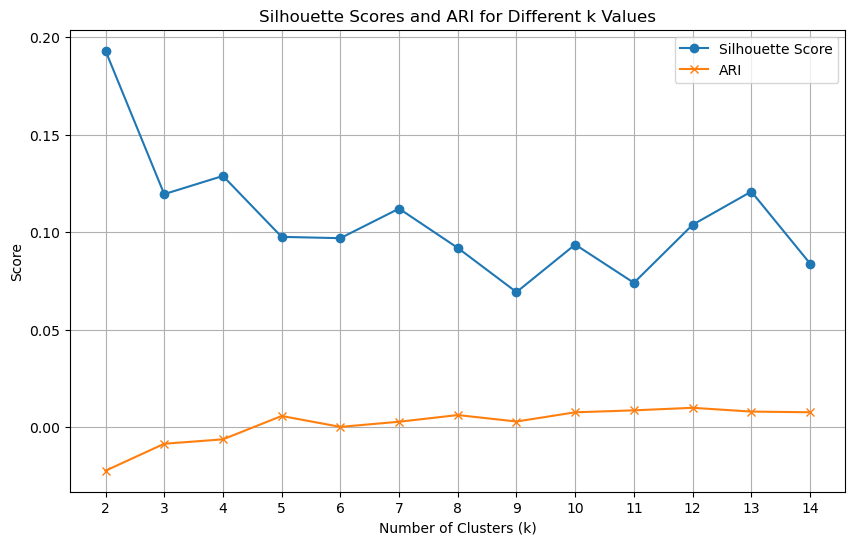

/Users/lianwang/opt/anaconda3/envs/cs229-final-project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


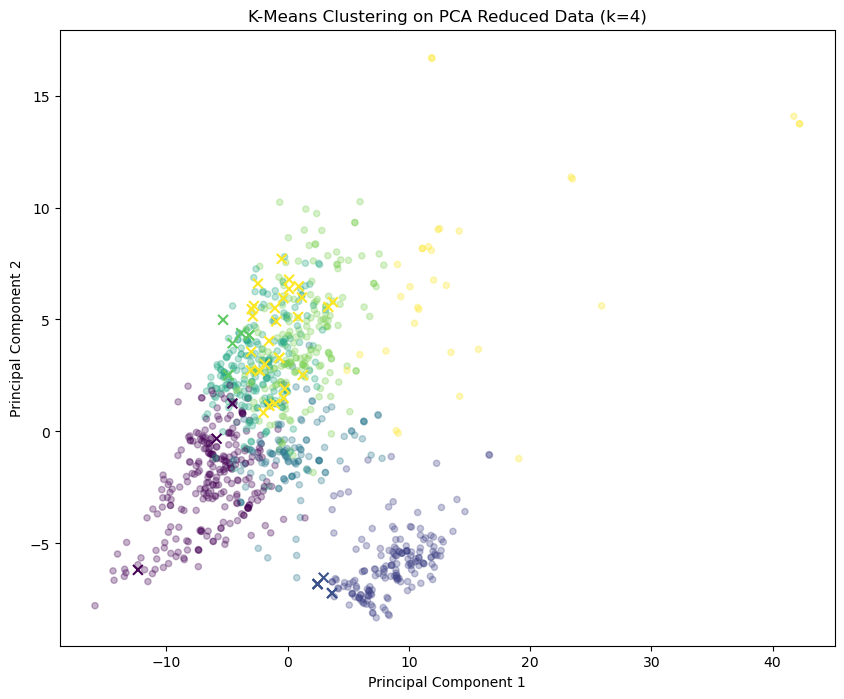

Cluster-wise Precision: {0: 0.232, 1: 0.8695652173913043}
Cluster-wise Recall: {0: 0.9747899159663865, 1: 0.04950495049504951}
Average Precision: 0.5507826086956522
Average Recall: 0.512147433230718


/Users/lianwang/opt/anaconda3/envs/cs229-final-project/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [96]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score, silhouette_score, confusion_matrix
import numpy as np

import matplotlib.pyplot as plt

# Apply PCA to reduce data to all components
pca = PCA()
pca_components = pca.fit_transform(data_combined)

# Calculate silhouette score and ARI for a range of k values
silhouette_scores = []
ari_scores = []
k_values = range(2, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(pca_components)
    silhouette_avg = silhouette_score(pca_components, clusters)
    ari_score = adjusted_rand_score(data['Interaction'], clusters)
    silhouette_scores.append(silhouette_avg)
    ari_scores.append(ari_score)
    print(f"k={k}, Silhouette Score: {silhouette_avg}, ARI: {ari_score}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(list(k_values), silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(list(k_values), ari_scores, marker='x', label='ARI')
plt.title('Silhouette Scores and ARI for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.xticks(ticks=list(k_values))  # Use integer values for x ticks
plt.legend()
plt.grid(True)
plt.savefig('../output/silhouette_ari_scores.png', dpi=300)
plt.show()


############ K-means with k=4
# Perform K-Means clustering on the reduced PCA data
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(pca_components)

# Visualize the clusters in 3D (using the first 3 PCA components)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points with different markers based on interaction label
for interaction_label in [0, 1]:
    mask = data['Interaction'] == interaction_label
    if interaction_label == 0:
        marker = 'o'
        size = 20
        facecolors = 'none'  # hollow points
    else:
        marker = 'x'
        size = 50
        facecolors = 'auto'  # filled points
    ax.scatter(pca_components[mask, 0], pca_components[mask, 1], pca_components[mask, 2], 
               c=clusters[mask], cmap='viridis', s=size, marker=marker, label=f'Interaction {interaction_label}', facecolors=facecolors)

ax.set_title('K-Means Clustering on PCA Reduced Data (k=4)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
#plt.show()
plt.close()

# Visualize the clusters in 2D (using the first 2 PCA components)
plt.figure(figsize=(10, 8))

# Plot points with different markers based on interaction label
for interaction_label in [0, 1]:
    mask = data['Interaction'] == interaction_label
    if interaction_label == 0:
        plt.scatter(pca_components[mask, 0], pca_components[mask, 1], 
                    c=clusters[mask], cmap='viridis', s=20, marker='o', 
                    facecolors='none', alpha=0.3, 
                    label=f'Interaction {interaction_label}')
    else:
        plt.scatter(pca_components[mask, 0], pca_components[mask, 1], 
                    c=clusters[mask], cmap='viridis', s=50, marker='x', 
                    facecolors='auto', label=f'Interaction {interaction_label}')
plt.title('K-Means Clustering on PCA Reduced Data (k=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('../output/4means_pca_2d.png', dpi=300)
plt.show()


#### Precision and recall for k=2
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_components)

# Create a confusion matrix between the true labels and cluster assignments
conf_matrix = confusion_matrix(data["Interaction"].values, clusters)

# Calculate Precision and Recall for each cluster (class)
precision = {}
recall = {}

# Loop over each cluster and calculate precision and recall for the corresponding class
for i in range(len(np.unique(clusters))):  # for each cluster
    cluster_points = conf_matrix[i]
    
    # Precision for the current cluster
    precision[i] = cluster_points[i] / np.sum(cluster_points) if np.sum(cluster_points) > 0 else 0
    
    # Recall for the current cluster
    recall[i] = cluster_points[i] / np.sum(conf_matrix[:, i]) if np.sum(conf_matrix[:, i]) > 0 else 0

# Average Precision and Recall across clusters
avg_precision = np.mean(list(precision.values()))
avg_recall = np.mean(list(recall.values()))

print("Cluster-wise Precision:", precision)
print("Cluster-wise Recall:", recall)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)



\section{TSNE and clustering on MPNN molecule embeddings}

Silhouette Score: -0.47193893790245056
Adjusted Rand Index (ARI): -0.026205313845530282
Normalized Mutual Information (NMI): 0.04584817863556059


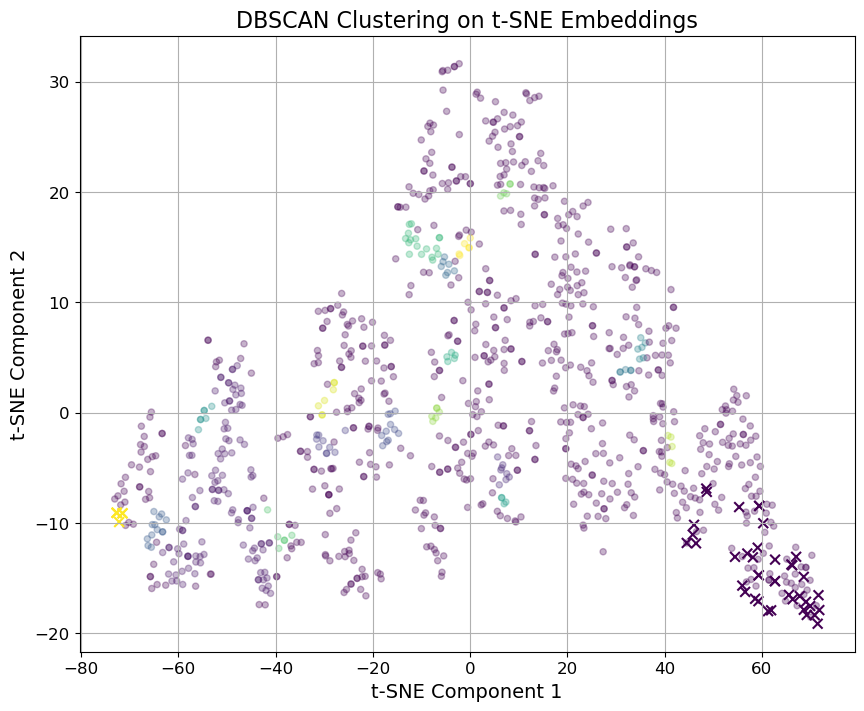

k=2, Silhouette Score: 0.43443673849105835, ARI: -0.021237571817836417
k=3, Silhouette Score: 0.4313628077507019, ARI: 0.08783542091067366
k=4, Silhouette Score: 0.35210561752319336, ARI: 0.04047053194194644
k=5, Silhouette Score: 0.28195756673812866, ARI: 0.029051308637958892
k=6, Silhouette Score: 0.2471461147069931, ARI: 0.025347774991572616
k=7, Silhouette Score: 0.25701576471328735, ARI: 0.024335595801521975
k=8, Silhouette Score: 0.2581077814102173, ARI: 0.01742946393149679
k=9, Silhouette Score: 0.2610134780406952, ARI: 0.020726389943505508
k=10, Silhouette Score: 0.2535201907157898, ARI: 0.024157215970878675
k=11, Silhouette Score: 0.2420719712972641, ARI: 0.020521230674902708
k=12, Silhouette Score: 0.23979753255844116, ARI: 0.01738593085571236
k=13, Silhouette Score: 0.22698432207107544, ARI: 0.013726174045325343
k=14, Silhouette Score: 0.23237235844135284, ARI: 0.011246471355609817


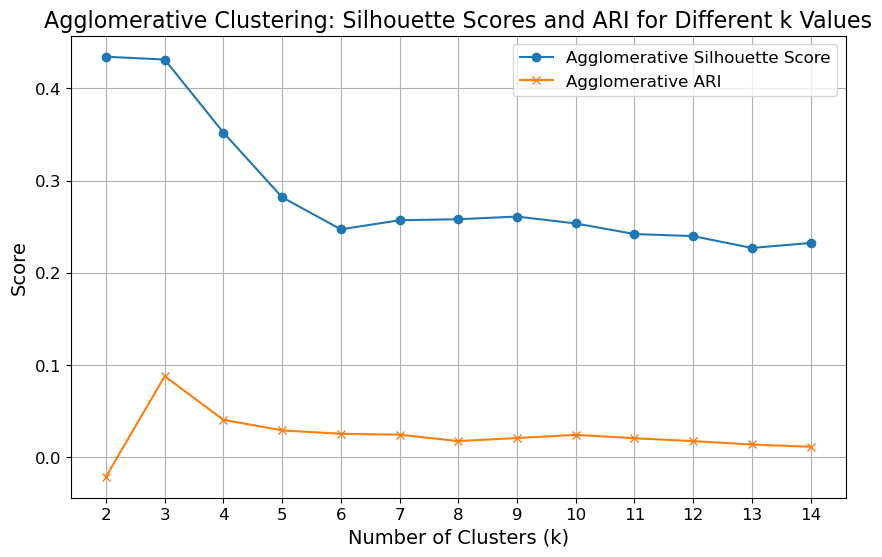

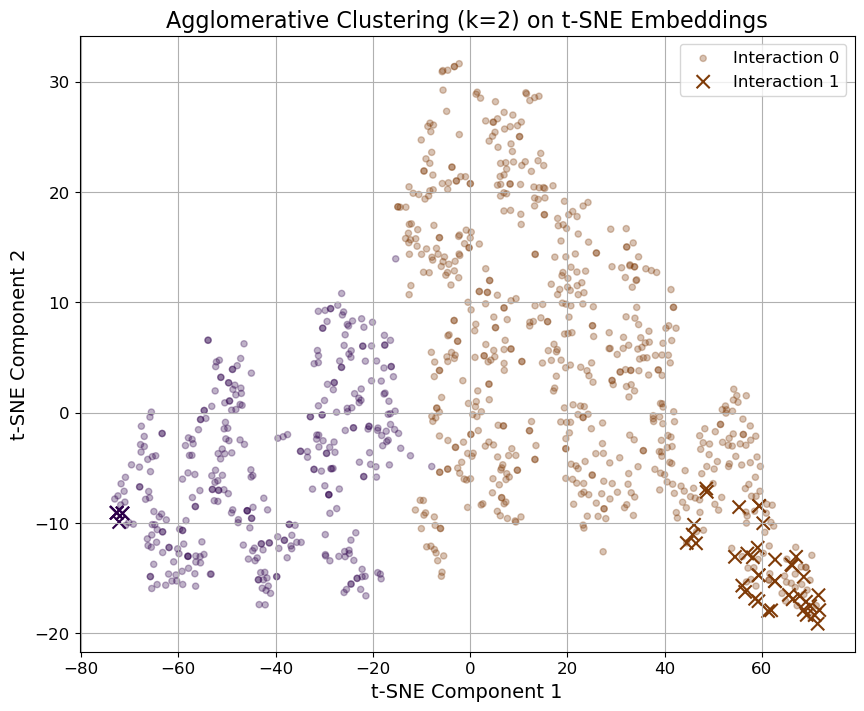

In [118]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

# Load embeddings from a .npy file
embeddings = np.load('../output/embeddings.npy')

# Perform DBSCAN clustering on the embeddings
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(embeddings)

# Calculate silhouette score, ARI, and NMI for the clustering
silhouette_avg = silhouette_score(embeddings, clusters)
ari = adjusted_rand_score(data['Interaction'], clusters)
nmi = normalized_mutual_info_score(data['Interaction'], clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize the clusters in 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
for interaction_label in [0, 1]:
    mask = data['Interaction'] == interaction_label
    if interaction_label == 0:
        plt.scatter(embeddings_tsne[mask, 0], embeddings_tsne[mask, 1], 
                    c=clusters[mask], cmap='viridis', s=20, marker='o', 
                    facecolors='none', alpha=0.3, 
                    label=f'Interaction {interaction_label}')
    else:
        plt.scatter(embeddings_tsne[mask, 0], embeddings_tsne[mask, 1], 
                    c=clusters[mask], cmap='viridis', s=50, marker='x', 
                    facecolors='auto', label=f'Interaction {interaction_label}')
plt.title('DBSCAN Clustering on t-SNE Embeddings', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.savefig('../output/embeddings_dbscan_tsne_2d.png', dpi=300)
plt.show()

# Calculate silhouette score and ARI for a range of k values for Agglomerative Clustering
agg_silhouette_scores = []
agg_ari_scores = []
k_values = range(2, 15)

for k in k_values:
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    agg_clusters = agg_clustering.fit_predict(embeddings)
    silhouette_avg = silhouette_score(embeddings, agg_clusters)
    ari_score = adjusted_rand_score(data['Interaction'], agg_clusters)
    agg_silhouette_scores.append(silhouette_avg)
    agg_ari_scores.append(ari_score)
    print(f"k={k}, Silhouette Score: {silhouette_avg}, ARI: {ari_score}")

# Plot silhouette scores and ARI for Agglomerative Clustering
plt.figure(figsize=(10, 6))
plt.plot(list(k_values), agg_silhouette_scores, marker='o', label='Agglomerative Silhouette Score')
plt.plot(list(k_values), agg_ari_scores, marker='x', label='Agglomerative ARI')
plt.title('Agglomerative Clustering: Silhouette Scores and ARI for Different k Values', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(ticks=list(k_values), fontsize=12)  # Use integer values for x ticks
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('../output/agg_silhouette_ari_scores.png', dpi=300)
plt.show()

# Perform Agglomerative Clustering with k=2
agg_clustering_2 = AgglomerativeClustering(n_clusters=2)
agg_clusters_2 = agg_clustering_2.fit_predict(embeddings)

# Visualize the clusters in 2D using t-SNE
plt.figure(figsize=(10, 8))
for interaction_label in [0, 1]:
    mask = data['Interaction'] == interaction_label
    if interaction_label == 0:
        plt.scatter(embeddings_tsne[mask, 0], embeddings_tsne[mask, 1], 
                    c=agg_clusters_2[mask], cmap='PuOr', s=20, marker='o', 
                    facecolors='none', alpha=0.3, 
                    label=f'Interaction {interaction_label}')
    else:
        plt.scatter(embeddings_tsne[mask, 0], embeddings_tsne[mask, 1], 
                    c=agg_clusters_2[mask], cmap='PuOr', s=90, marker='x', 
                    facecolors='auto', label=f'Interaction {interaction_label}')
plt.title('Agglomerative Clustering (k=2) on t-SNE Embeddings', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.savefig('../output/agg_clusters_tsne_2d.png', dpi=300)
plt.show()